# Photo recognition

Found 111 files belonging to 5 classes.
Found 45 files belonging to 5 classes.
Found 17 files belonging to 5 classes.
['1finger', '2fingers', '3fingers', '4fingers', '5fingers']


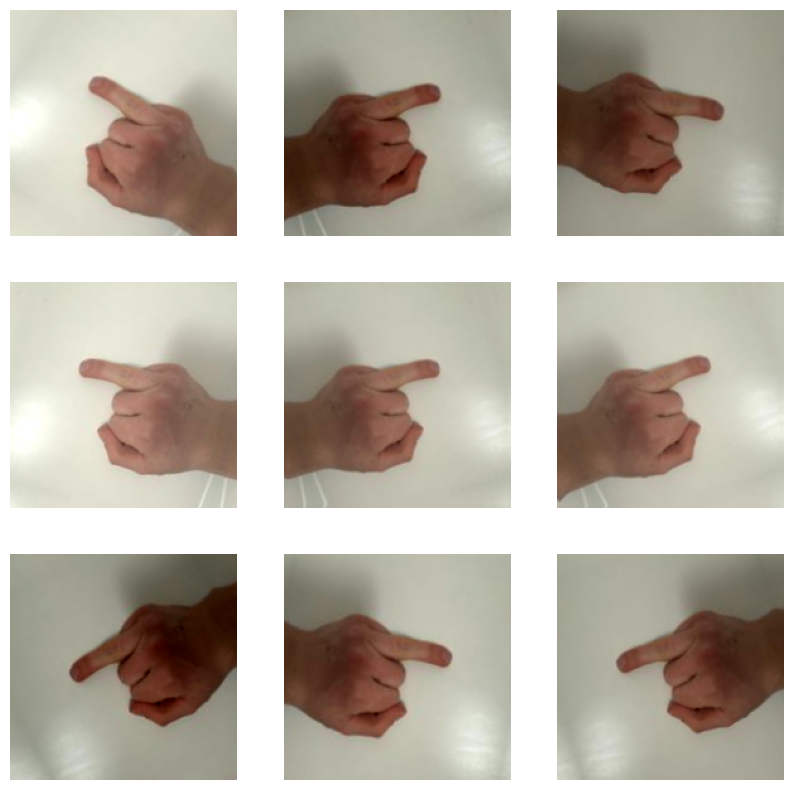

In [28]:
import os, shutil, pathlib
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.utils import image_dataset_from_directory

dir = pathlib.Path('../Photos-CNN/Photos/Train')
valDir = pathlib.Path('../Photos-CNN/Photos/Validation')
testDir = pathlib.Path('../Photos-CNN/Photos/Test')

train_dataset = image_dataset_from_directory(
    dir,
    image_size=(180, 180),
    batch_size=2,
    shuffle=True,
)

validation_dataset = image_dataset_from_directory(
    valDir,
    image_size = (180, 180),
    batch_size = 4,
)

test_dataset = image_dataset_from_directory(
    testDir,
    image_size=(180, 180)
)

print(train_dataset.class_names)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.05),
        layers.RandomContrast(0.2),
        layers.RandomBrightness(0.2),
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3929 - loss: 1.8943 - val_accuracy: 0.2667 - val_loss: 1.6226
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3714 - loss: 1.5634 - val_accuracy: 0.2667 - val_loss: 1.5749
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3413 - loss: 1.5149 - val_accuracy: 0.2667 - val_loss: 1.7814
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3529 - loss: 1.4139 - val_accuracy: 0.2667 - val_loss: 1.6144
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3341 - loss: 1.4893 - val_accuracy: 0.2667 - val_loss: 1.6108
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4218 - loss: 1.4907 - val_accuracy: 0.2667 - val_loss: 1.6674
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3539 - loss: 1.4382 - val_accuracy: 0.2444 - val_loss: 1.6097
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3805 - loss: 1.4769 - val_accuracy: 0.

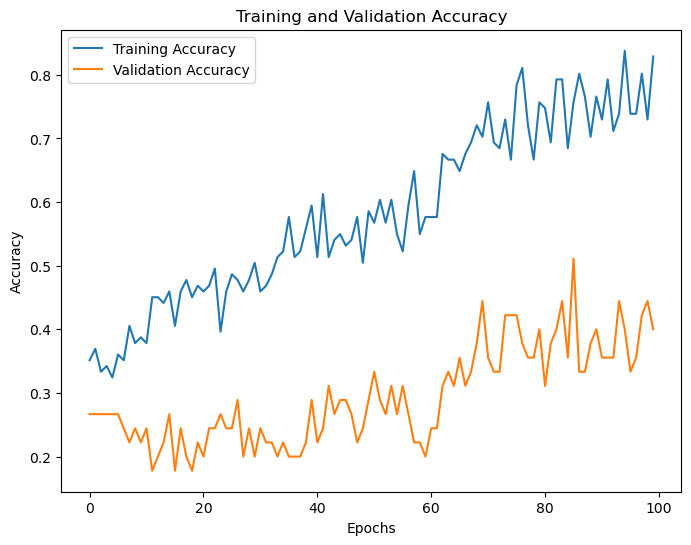

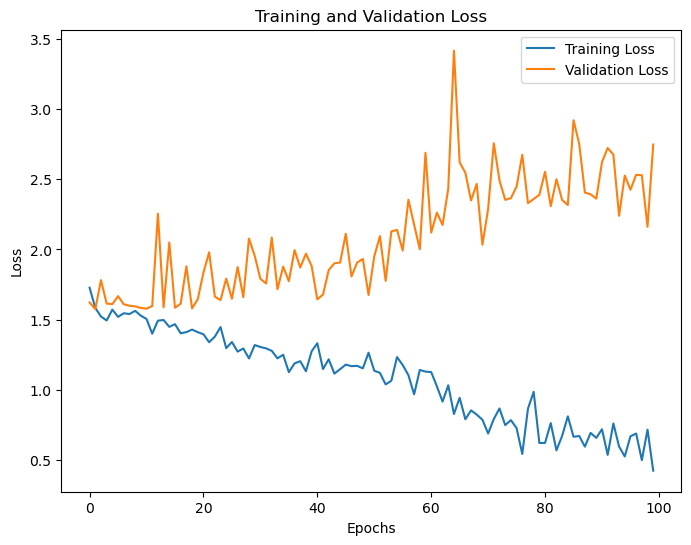

In [ ]:
VAIHDETAANKO KUVIEN AIHEITA TÄÄ ON IHAN HELVETTIÄ :D


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1.0 / 255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)


num_classes = len(train_dataset.class_names)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_dataset,                
    validation_data=validation_dataset,  
    epochs=100                    
)

model.save("finger-model.keras")

plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()



In [30]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4706 - loss: 2.1681
Test accuracy: 0.4706
Test loss: 2.1681


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.4706 - loss: 2.1681
Test Loss: 2.168
Test Accuracy: 0.471
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


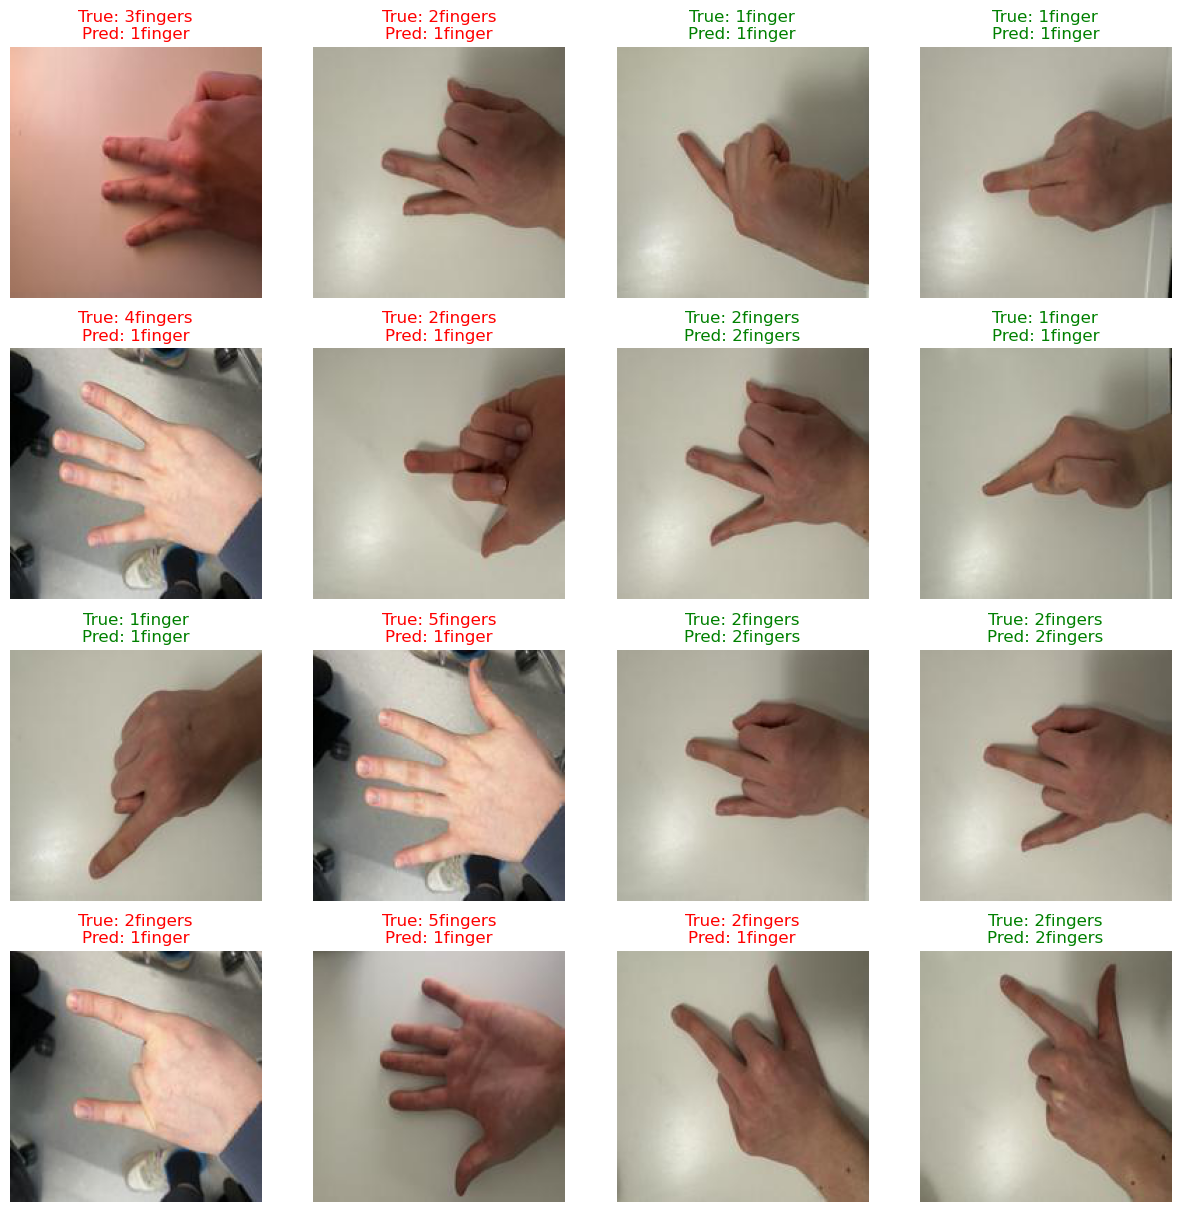

In [31]:
import matplotlib.pyplot as plt
import numpy as np

test_model = keras.models.load_model("finger-model.keras")

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

class_names = test_dataset.class_names

plt.figure(figsize=(15, 15))
max_images = 16
for images, labels in test_dataset.take(1): 
    predictions = test_model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    labels = labels.numpy() 
    for i in range(min(len(images), max_images)):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[labels[i]]
        predicted_label = class_names[predicted_classes[i]]
        color = "green" if predicted_label == true_label else "red"
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis("off")
plt.show()